## Отчет по ЛР 2

**Выполнил**: Стрыгин Денис Дмитриевич

---
Для эксперимента решил взять данные с [Kaggle](https://www.kaggle.com/datasets/tinasoni/normal-distribution-data?resource=download).

1.	Найти на сайте РосСтат  https://rosstat.gov.ru/statistic   непрерывное распределение случайной величины, которое было бы близко к нормальному.
Построить графики распределения.

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df_lab2 = pd.read_csv("./CompanyABCProfit.csv")
df_lab2.columns = ['Yaer', 'Profit']

df_gaus = pd.read_excel("./64_2022_СЗН.xlsx")
df_gaus_clear = df_gaus[['Unnamed: 0', 'Unnamed: 4']]
df_gaus_clear.columns = ['label', 'data']
df_gaus_clear = df_gaus_clear.iloc[6:].copy()
df_gaus_clear['data'] = df_gaus_clear['data'].astype(float)

In [30]:
def visualize_density_curve(series):
    plot = sns.distplot(series, hist=False, kde=True)
    plt.title('Кривая плотности для ' + series.name)
    plt.xlabel('Значение')
    plt.ylabel('Плотность вероятности')
    plt.show(plot)
    print()

Построим график распределения непрерывного распределения.
Будем считать, что температура - непрерывная величина.

Для построения распределения будем использовать kde.

/tmp/ipykernel_947/1028879061.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(series, hist=False, kde=True)


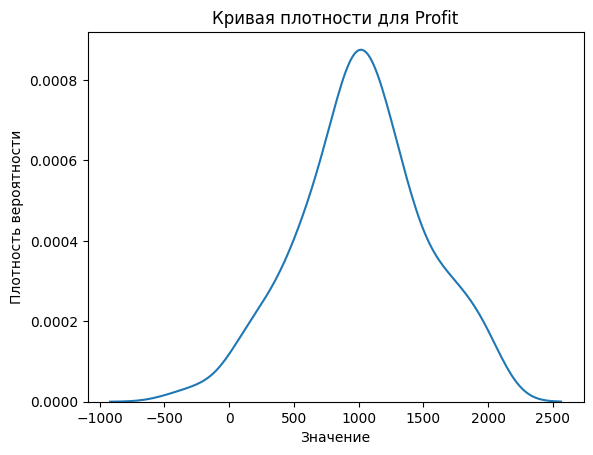

In [29]:
visualize_density_curve(df_lab2['Profit'])

2.	Посчитать в распределение близком к нормальному  1 л.р. и найденном непрерывном распределении:
- мат.ожидание (*)
- 2 (дисперсию) (**), 3 (асимметрию), 4 (эксцесс) моменты 
- квантили уровня 0,05 и 0,95; 2,5%-ную точку  для найденной случайной величины. 


In [31]:
def calculate_mean(series):
    return series.sum() / len(series)

def calculate_central_moment(series, k=2):
    mean = calculate_mean(series)
    return calculate_mean((series - mean) ** k)

def calculate_variance(series):
    return calculate_central_moment(series, k=2)

def calculate_skewness(series):
    third_moment = calculate_central_moment(series, k=3)
    std_dev = calculate_variance(series) ** 0.5
    return third_moment / std_dev ** 3

def calculate_kurtosis(series):
    fourth_moment = calculate_central_moment(series, k=4)
    std_dev = calculate_variance(series) ** 0.5
    return fourth_moment / std_dev ** 4 - 3

def calculate_quantile(series, q=0.95):
    sorted_series = series.sort_values()
    index = int(len(sorted_series) * q)
    return sorted_series.iloc[index]

def calculate_percent_point(series, p=0.025):
    return calculate_quantile(series, 1 - p)

def display_statistics(series):
    print("Математическое ожидание:", calculate_mean(series))
    print("Дисперсия:", calculate_variance(series))
    print("Асимметрия:", calculate_skewness(series))
    print("Эксцесс:", calculate_kurtosis(series))
    print("Квантиль 0.05:", calculate_quantile(series, q=0.05))
    print("Квантиль 0.95:", calculate_quantile(series, q=0.95))
    print("Процентная точка 2.5%:", calculate_percent_point(series, p=0.025))
    

In [32]:
display_statistics(df_lab2['Profit'])

Математическое ожидание: 1021.99
Дисперсия: 236910.1899
Асимметрия: -0.12793336180347498
Эксцесс: -0.07659722857533025
Квантиль 0.05: 206
Квантиль 0.95: 1902
Процентная точка 2.5%: 1973


In [33]:
display_statistics(df_gaus_clear['data'])

Математическое ожидание: 57.75763342097417
Дисперсия: 42.70356005453082
Асимметрия: -0.3422712297448968
Эксцесс: 1.3276298886039708
Квантиль 0.05: 44.7559702495558
Квантиль 0.95: 68.09439424908163
Процентная точка 2.5%: 69.93341108766269


3.	Построить сравнительную диаграмму найденного распределения и распределения по нормальному закону с параметрами (*, **).

In [38]:
def generate_normal_distribution(start, end, mean, std_deviation, points=10000):
    constant = (2 * np.pi) ** 0.5
    variance = std_deviation ** 2
    normal_function = lambda x: 1 / (std_deviation * constant) * np.exp(-((x - mean) ** 2) / (2 * variance))
    x_values = np.linspace(start, end, points)
    return x_values, normal_function(x_values)

def plot_distribution_with_normal_fit(series):
    mean_value = expected(series)
    variance_value = variance(series)

    lower_bound = series.min()
    upper_bound = series.max()
    x, normal_curve = generate_normal_distribution(lower_bound, upper_bound, mean_value, variance_value ** 0.5)

    density_plot = sns.displot(series, stat="density")
    plt.plot(x, normal_curve, color="red")
    plt.legend(["Нормальное распределение", "Выборка"], loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show(density_plot)

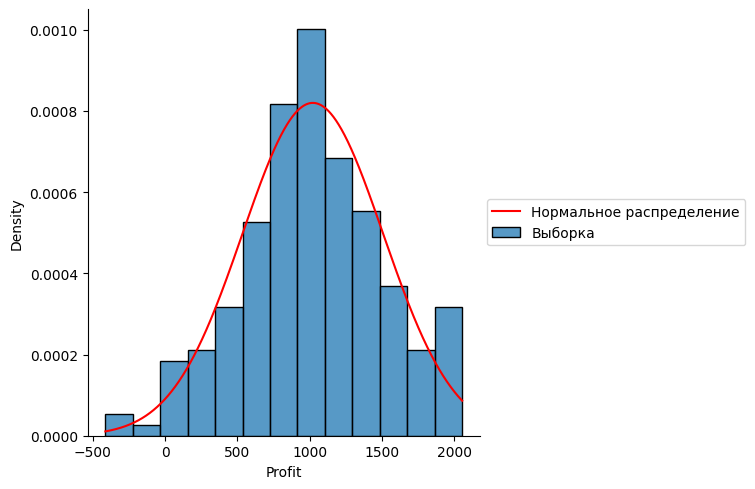

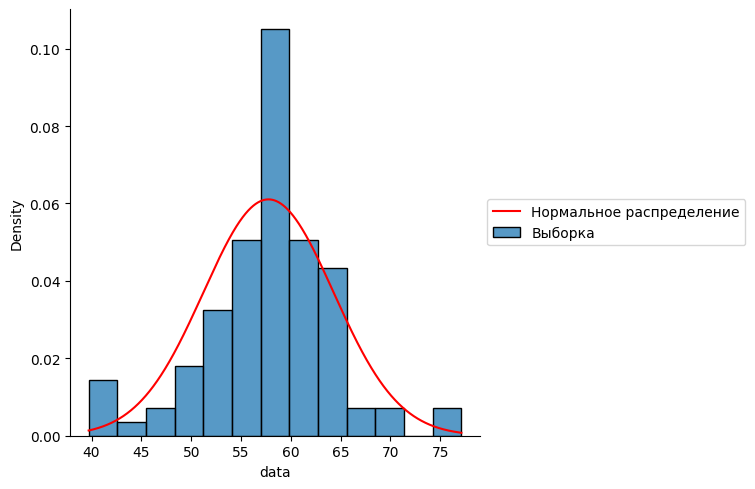

In [41]:
plot_distribution_with_normal_fit(df_lab2['Profit'])
plot_distribution_with_normal_fit(df_gaus_clear['data'])

#### Выводы:
После сравнения, понял, что подобрал более менее хороший вариант нормального распределения к лр1), также применил закон нормального распределения и визуализировал результат, убедившись в его работе